# 25 Mistakes You Shouldn't Make

Tests and implements from [here](https://youtu.be/_gaAoJBMJ_Q)

## Imports & Configs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.version

'3.10.6 (main, May 29 2023, 11:10:38) [GCC 11.3.0]'

In [2]:
file_dataset = './datasets/job_salaries.zip'

## 01/25 - Read an CSV with an unnecessary index

In [3]:
# The column 'id' (in this context) is an unnecessary feature. 
# We let to use just the usefull columns

usefull_columns = ['work_year', 'experience_level', 'employment_type', 'job_title', 'salary', 'salary_currency', \
                   'salary_in_usd', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']

salaries_df = pd.read_csv(file_dataset, compression='zip', usecols=usefull_columns)

display(salaries_df.shape, salaries_df.head())

(607, 11)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


## 02/25 - Spaces in columns

When columns has spaces isn't possible to use dot notation

In [4]:
# Creating DataFrame
data_dict = {
    'Age Person': np.random.randint(10, 100, 200), 
    'pression value': np.random.random(200) }

data = pd.DataFrame(data = data_dict)
display(data.columns)

# To use the notation [df].[column] is necessary that the column name haven't blank spaces. 

# It's possible to alter fields names
data.columns = ['age_person', 'pression_value']
display(data.columns)

# or ...
data.rename(columns={'age_person': 'AgePerson', 'pression_value': 'PressionValue'}, inplace=True)
display(data.columns)

Index(['Age Person', 'pression value'], dtype='object')

Index(['age_person', 'pression_value'], dtype='object')

Index(['AgePerson', 'PressionValue'], dtype='object')

## 03/25 - Use Queries

In [5]:
# Using salaries dataframe (01/25)

# Filtering work year = 2020
display(salaries_df.query("work_year == 2020").head())

# Filtering US Dollar Salaries more than the mean
salary_mean = int(salaries_df.salary_in_usd.mean())
salaries_more_than_mean = salaries_df.query(f"salary_in_usd > @salary_mean")
display(f"Salaries mean (USD) = {salary_mean}", salaries_more_than_mean.head())

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


'Salaries mean (USD) = 112297'

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
9,2020,SE,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S


## 05/25 - Use 'inplace'

In [6]:
# data.reset_index(inplace=True)
data.rename(columns={'AgePerson': 'age_person', 'PressionValue': 'pression_value'}, inplace=True)
display(data.columns)

Index(['age_person', 'pression_value'], dtype='object')

## 06/25 - Use vectorization

In [7]:
# Creating a new column with criteria dependent on other 
salaries_df['is_recent'] = salaries_df['work_year'] > 2021

# then show recents ...
display(salaries_df[salaries_df['is_recent']].sample(5))

# ... and oldies
display(salaries_df[~salaries_df['is_recent']].sample(5))

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,is_recent
354,2022,SE,FT,Data Engineer,60000,GBP,78526,GB,0,GB,M,True
304,2022,EN,FT,Data Engineer,40000,GBP,52351,GB,100,GB,M,True
595,2022,SE,FT,Data Analytics Manager,109280,USD,109280,US,100,US,M,True
399,2022,SE,FT,Data Scientist,158200,USD,158200,US,100,US,L,True
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M,True


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,is_recent
270,2021,EN,FT,Data Engineer,72500,USD,72500,US,100,US,L,False
248,2021,SE,FT,Data Engineer,70000,GBP,96282,GB,50,GB,L,False
113,2021,EN,PT,AI Scientist,12000,USD,12000,PK,100,US,M,False
66,2020,EN,FT,Data Scientist,43200,EUR,49268,DE,0,DE,S,False
218,2021,MI,FT,Machine Learning Engineer,75000,EUR,88654,BE,100,BE,M,False


## 07/25 - Use apply method

In [8]:
# Use apply method over the vars. In this case, we calculate the exchange rate dividing the salary (anyone currency) 
# by the salary in USD, when the salary is expressed in USD, the rate will be 1.0, of course

salaries_df['exchange'] = salaries_df.apply(lambda row : row.salary/ row.salary_in_usd, axis=1)
salaries_df.sample(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,is_recent,exchange
577,2022,SE,FT,Data Analyst,150075,USD,150075,US,100,US,M,True,1.000000
184,2021,MI,FL,Machine Learning Scientist,12000,USD,12000,PK,50,PK,M,False,1.000000
432,2022,MI,FT,Data Engineer,80000,EUR,87932,ES,100,ES,M,True,0.909794
419,2022,MI,FT,Machine Learning Scientist,160000,USD,160000,US,100,US,L,True,1.000000
242,2021,MI,FT,Data Engineer,110000,USD,110000,US,100,US,L,False,1.000000


## 08/25 - Use copy to make a new DataFrame

In [9]:
data_recent = salaries_df.loc[salaries_df.work_year > 2021].copy()
data_recent.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,is_recent,exchange
289,2022,SE,FT,Data Engineer,135000,USD,135000,US,100,US,M,True,1.0
290,2022,SE,FT,Data Analyst,155000,USD,155000,US,100,US,M,True,1.0
291,2022,SE,FT,Data Analyst,120600,USD,120600,US,100,US,M,True,1.0
292,2022,MI,FT,Data Scientist,130000,USD,130000,US,0,US,M,True,1.0
293,2022,MI,FT,Data Scientist,90000,USD,90000,US,0,US,M,True,1.0


## 09/25 - Don't create multiple intermediate dataframes 

In [10]:
# the best choice is use enchainment 
data_out = (salaries_df.query('work_year == 2021') \
    .groupby('employment_type')[['salary_in_usd']] \
    .max().sort_values('employment_type')) \
    .reset_index().copy()

data_out.head()

,employment_type,salary_in_usd
0,CT,416000
1,FL,20000
2,FT,600000
3,PT,69741


## 10/25 - Always work with appropriate types

In [jobs-salaries file](./job-salaries.ipynb) we handle and cast types

In [11]:
salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           607 non-null    int64  
 1   experience_level    607 non-null    object 
 2   employment_type     607 non-null    object 
 3   job_title           607 non-null    object 
 4   salary              607 non-null    int64  
 5   salary_currency     607 non-null    object 
 6   salary_in_usd       607 non-null    int64  
 7   employee_residence  607 non-null    object 
 8   remote_ratio        607 non-null    int64  
 9   company_location    607 non-null    object 
 10  company_size        607 non-null    object 
 11  is_recent           607 non-null    bool   
 12  exchange            607 non-null    float64
dtypes: bool(1), float64(1), int64(4), object(7)
memory usage: 57.6+ KB


## 11/25 - Use boolean instead of string values

In [12]:
salaries_df['salary_over_100_000'] = salaries_df.apply(lambda row : 'yes' if row['salary_in_usd'] > 100_000 else 'no', axis=1)

# and then change ...
salaries_df.salary_over_100_000 = salaries_df.salary_over_100_000.map({'yes':True, 'no':False})

salaries_df.sample(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,is_recent,exchange,salary_over_100_000
486,2022,SE,FT,Data Scientist,230000,USD,230000,US,100,US,M,True,1.0,True
228,2021,SE,FT,Data Scientist,135000,USD,135000,US,0,US,L,False,1.0,True
256,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L,False,1.0,True
528,2022,SE,FT,Data Analyst,100000,USD,100000,US,100,US,M,True,1.0,False
277,2021,SE,FT,AI Scientist,55000,USD,55000,ES,100,ES,L,False,1.0,False
371,2022,SE,FT,Machine Learning Engineer,189650,USD,189650,US,0,US,M,True,1.0,True
168,2021,EN,FT,BI Data Analyst,55000,USD,55000,US,50,US,S,False,1.0,False
352,2022,SE,FT,Data Scientist,167000,USD,167000,US,100,US,M,True,1.0,True
67,2020,SE,FT,Data Science Manager,190200,USD,190200,US,100,US,M,False,1.0,True
78,2021,MI,CT,ML Engineer,270000,USD,270000,US,100,US,L,False,1.0,True


## 12/25 - Prefer quick plot

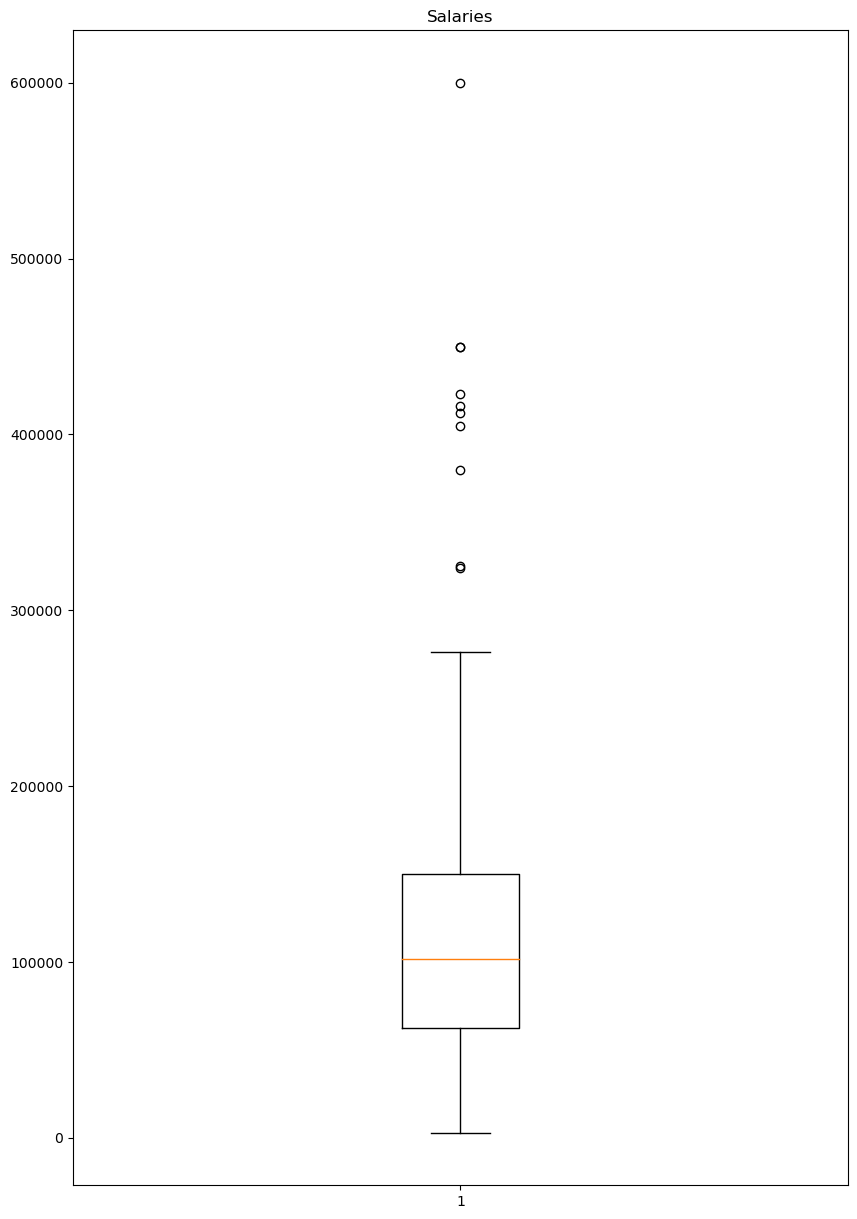

In [13]:
# "Long" method
fig, ax = plt.subplots(figsize=(10,15))
plt.boxplot(salaries_df.salary_in_usd.values)
ax.set_title('Salaries')
plt.show()

<AxesSubplot:>

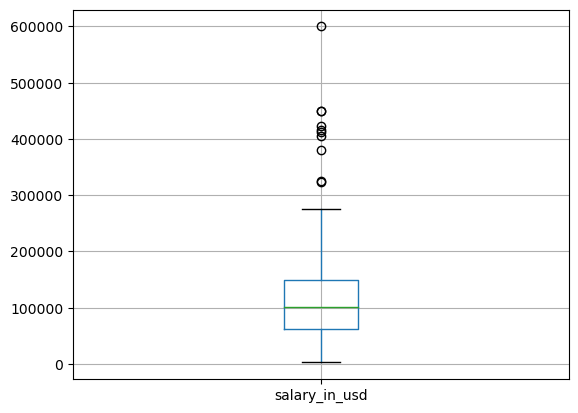

In [14]:
# Simplified new "short" method
salaries_df.boxplot(column=['salary_in_usd'])

## 13/25 - Use string method directly in array (column)

In [15]:
salaries_df['job_title'] = list(salaries_df.job_title.str.upper())
salaries_df.sample(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,is_recent,exchange,salary_over_100_000
544,2022,SE,FT,DATA ENGINEER,130000,USD,130000,US,100,US,M,True,1.000000,True
67,2020,SE,FT,DATA SCIENCE MANAGER,190200,USD,190200,US,100,US,M,False,1.000000,True
308,2022,MI,FT,DATA ANALYST,126500,USD,126500,US,0,US,M,True,1.000000,True
222,2021,MI,FT,DATA SCIENTIST,2500000,INR,33808,IN,0,IN,M,False,73.946995,False
132,2021,MI,FT,APPLIED MACHINE LEARNING SCIENTIST,38400,USD,38400,VN,100,US,M,False,1.000000,False


## 14/25 - Don't repeat code

In [16]:
# Build some dataframes (by year) and calculate the mean of salaries into each one of them
years = salaries_df.work_year.unique()
result = {}

def salary_mean(_df:pd.DataFrame, _year:int):
    result = _df.loc[_df.work_year == _year].copy()
    result['mean_no_sense'] = result.apply(lambda row : np.mean([row.salary, row.salary_in_usd]), axis=1)
    return result

dataframes = [salary_mean(salaries_df, year) for year in years]

dataframes[0].head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,is_recent,exchange,salary_over_100_000,mean_no_sense
0,2020,MI,FT,DATA SCIENTIST,70000,EUR,79833,DE,0,DE,L,False,0.876830,False,74916.5
1,2020,SE,FT,MACHINE LEARNING SCIENTIST,260000,USD,260000,JP,0,JP,S,False,1.000000,True,260000.0
2,2020,SE,FT,BIG DATA ENGINEER,85000,GBP,109024,GB,50,GB,M,False,0.779645,True,97012.0
3,2020,MI,FT,PRODUCT DATA ANALYST,20000,USD,20000,HN,0,HN,S,False,1.000000,False,20000.0
4,2020,SE,FT,MACHINE LEARNING ENGINEER,150000,USD,150000,US,50,US,L,False,1.000000,True,150000.0


## 15/25 - Rename columns

In [17]:
# Get old columns
old_columns = salaries_df.columns.to_list()

# Create new columns
new_columns = [f"new_{col}" for col in old_columns]

# Rename columns in dataframe
salaries_df.columns = new_columns

display(old_columns, salaries_df.columns)

# Rollback
salaries_df.columns = old_columns

['work_year',
 'experience_level',
 'employment_type',
 'job_title',
 'salary',
 'salary_currency',
 'salary_in_usd',
 'employee_residence',
 'remote_ratio',
 'company_location',
 'company_size',
 'is_recent',
 'exchange',
 'salary_over_100_000']

Index(['new_work_year', 'new_experience_level', 'new_employment_type',
       'new_job_title', 'new_salary', 'new_salary_currency',
       'new_salary_in_usd', 'new_employee_residence', 'new_remote_ratio',
       'new_company_location', 'new_company_size', 'new_is_recent',
       'new_exchange', 'new_salary_over_100_000'],
      dtype='object')

## 16/25 - Don't aggregate groups manually

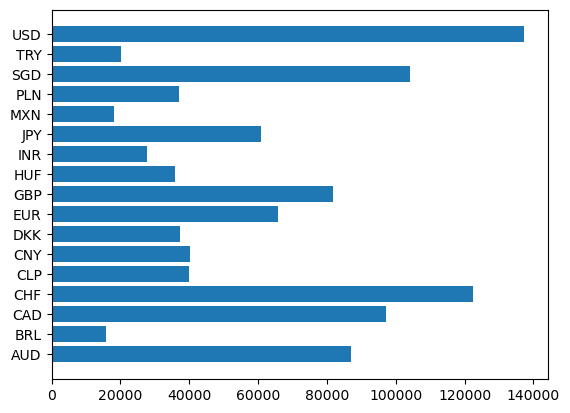

In [18]:
# Mean of salaries by currency
mean_salaries_by_currency = salaries_df.groupby('salary_currency')['salary_in_usd'].mean()

plt.barh(mean_salaries_by_currency.index, 
    mean_salaries_by_currency.values)

plt.show()

## 17/25 - Aggregate multiple informations

In [19]:
aggregate_data = salaries_df.groupby('work_year')['salary_in_usd'].agg(['min','max','mean','count'])
display(aggregate_data)

,min,max,mean,count
work_year,,,,
2020,5707,450000,95813.000000,72
2021,2859,600000,99853.792627,217
2022,10000,405000,124522.006289,318


## 18/25 - View changes

In [20]:
# Add columns to follow the changes
aggregate_data['pct_change_mean'] = aggregate_data['mean'].pct_change()
aggregate_data['diff_mean'] = aggregate_data['mean'].diff()

display(aggregate_data)

,min,max,mean,count,pct_change_mean,diff_mean
work_year,,,,,,
2020,5707,450000,95813.000000,72,NaN,NaN
2021,2859,600000,99853.792627,217,0.042174,4040.792627
2022,10000,405000,124522.006289,318,0.247043,24668.213663


## 19/25 - Don't save in _CSV_ when is not necessary; use more efficient formats (like _parquet_)

In [21]:
salaries_df.to_parquet('./datasets/salaries.parquet')

In [22]:
%%time
# The parquet file have more data
result = pd.read_parquet('./datasets/salaries.parquet')

CPU times: user 7.2 ms, sys: 11.6 ms, total: 18.8 ms
Wall time: 26.2 ms


## 20/25 - Use styles in pandas dataframe

In [23]:
salaries_df.sort_values(['work_year', 'salary_in_usd']) \
    .head(15)[['salary_in_usd']] \
    .reset_index(drop=True) \
    .style.background_gradient(cmap='Reds')

,salary_in_usd
0,5707
1,6072
2,6072
3,8000
4,10000
5,15966
6,20000
7,21669
8,33511
9,35735


## 21/25 - Do not use _x and _y when merging 2 datasets ...
### ... prefer to use words from the context (domain)

In [24]:
# The var 'dataframes' was declared in the 14 tip
# Warning! This script don't make sense!!

salaries_merged = dataframes[0].merge(dataframes[1], on=['job_title'], suffixes=('_2020', '_2021'))
salaries_merged.sample(10)

,work_year_2020,experience_level_2020,employment_type_2020,job_title,salary_2020,salary_currency_2020,salary_in_usd_2020,employee_residence_2020,remote_ratio_2020,company_location_2020,...,salary_currency_2021,salary_in_usd_2021,employee_residence_2021,remote_ratio_2021,company_location_2021,company_size_2021,is_recent_2021,exchange_2021,salary_over_100_000_2021,mean_no_sense_2021
1250,2020,SE,FT,DATA ENGINEER,720000,MXN,33511,MX,0,MX,...,PLN,28476,PL,100,PL,L,False,3.862902,False,69238.0
1035,2020,EN,FT,MACHINE LEARNING ENGINEER,138000,USD,138000,US,100,US,...,EUR,51064,IT,50,IT,L,False,0.845997,False,47132.0
1004,2020,EN,FT,MACHINE LEARNING ENGINEER,250000,USD,250000,US,50,US,...,USD,125000,US,100,US,S,False,1.000000,True,125000.0
580,2020,MI,FT,DATA SCIENTIST,138350,USD,138350,US,100,US,...,EUR,77684,FR,50,FR,M,False,0.845991,False,71702.0
1222,2020,SE,FT,DATA ENGINEER,42000,EUR,47899,GR,50,GR,...,INR,30428,IN,100,IN,L,False,73.945051,False,1140214.0
287,2020,MI,FT,DATA SCIENTIST,45760,USD,45760,PH,100,US,...,USD,147000,US,50,US,L,False,1.000000,True,147000.0
875,2020,MI,FT,DATA SCIENTIST,55000,EUR,62726,FR,50,LU,...,USD,160000,US,100,US,L,False,1.000000,True,160000.0
428,2020,MI,FT,DATA SCIENTIST,34000,EUR,38776,ES,100,ES,...,GBP,116914,GB,50,GB,L,False,0.727030,True,100957.0
949,2020,SE,FT,BIG DATA ENGINEER,85000,GBP,109024,GB,50,GB,...,USD,60000,ES,50,RO,M,False,1.000000,False,60000.0
599,2020,EN,PT,DATA SCIENTIST,19000,EUR,21669,IT,50,IT,...,CLP,40038,CL,100,CL,L,False,759.278685,False,15220019.0


## 22/25 - Count result from merge
### ... and use 'assert' to test!

In [25]:
assert len(salaries_merged) == 1606, "The len of 'salaries_merged' must be equal 1606"

## 23/25 - Staking change command in one line of code

In [26]:
salaries_df2 = (salaries_df.sort_values('job_title', ascending=False)
    .groupby('work_year'))

display(salaries_df2.head())

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,is_recent,exchange,salary_over_100_000
283,2021,SE,CT,STAFF DATA SCIENTIST,105000,USD,105000,US,100,US,M,False,1.000000,True
174,2021,SE,FT,RESEARCH SCIENTIST,51400,EUR,60757,PT,50,PT,L,False,0.845993,False
194,2021,SE,FT,RESEARCH SCIENTIST,120500,CAD,96113,CA,50,CA,L,False,1.253733,False
106,2021,MI,FT,RESEARCH SCIENTIST,235000,CAD,187442,CA,100,CA,L,False,1.253721,True
466,2022,SE,FT,RESEARCH SCIENTIST,144000,USD,144000,US,50,US,L,True,1.000000,True
26,2020,EN,FT,RESEARCH SCIENTIST,42000,USD,42000,NL,50,NL,L,False,1.000000,False
72,2021,EN,FT,RESEARCH SCIENTIST,60000,GBP,82528,GB,50,GB,L,False,0.727026,False
508,2022,EN,FT,RESEARCH SCIENTIST,120000,USD,120000,US,100,US,L,True,1.000000,True
498,2022,SE,FT,RESEARCH SCIENTIST,85000,EUR,93427,FR,50,FR,L,True,0.909801,False
33,2020,MI,FT,RESEARCH SCIENTIST,450000,USD,450000,US,0,US,M,False,1.000000,True


## 24/25 - Prefer 'category' as a data type to spend less memory

In [27]:
d2 = salaries_df[['employment_type']].copy()
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   employment_type  607 non-null    object
dtypes: object(1)
memory usage: 4.9+ KB


In [28]:
d2['employment_type'] = d2['employment_type'].astype('category')
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   employment_type  607 non-null    category
dtypes: category(1)
memory usage: 939.0 bytes


## 25/25 - Remove or avoid duplicated columns

In [29]:
df_duplicate = pd.concat([salaries_df, dataframes[1]], axis=1)
df_duplicate = df_duplicate.loc[:,~df_duplicate.columns.duplicated()].copy()
df_duplicate['job_title'].head()

0                DATA SCIENTIST
1    MACHINE LEARNING SCIENTIST
2             BIG DATA ENGINEER
3          PRODUCT DATA ANALYST
4     MACHINE LEARNING ENGINEER
Name: job_title, dtype: object